# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Manuel, Johann Jude\
_Student No._: 2021-08318\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [83]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



In [84]:
radius_ratio = 0.8
N = 400 # defines the image resolution
freq = [1, 3, 5]

# Create grid
xx = np.linspace(0, 1, N)
X, Y = np.meshgrid(xx, xx) 

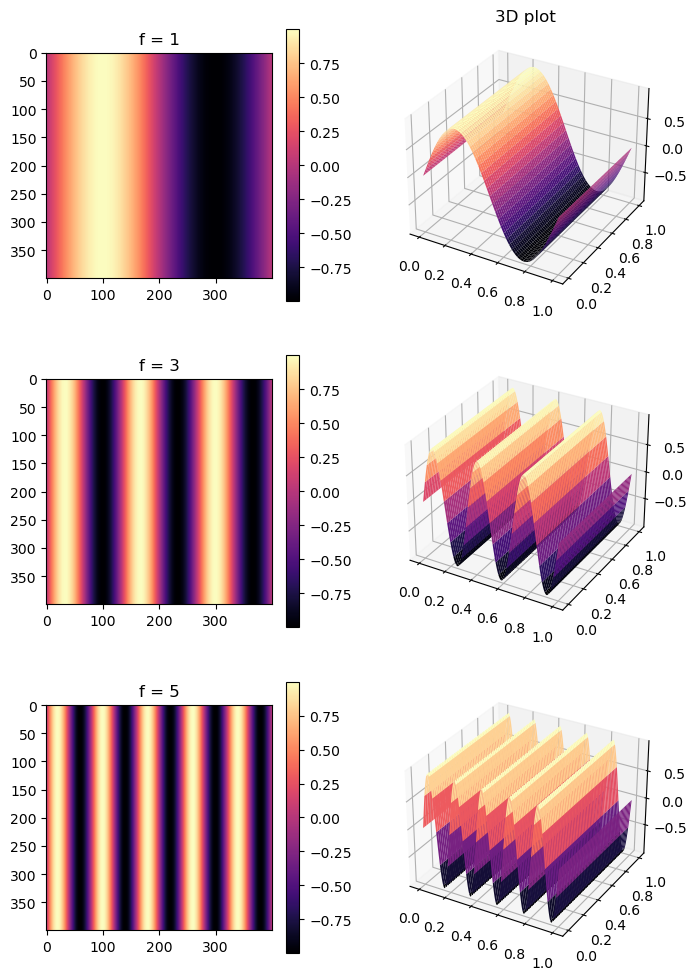

In [85]:
cmap = "magma"
fig, ax = plt.subplots(3, 2, figsize=(8, 12))

for i, f in enumerate(freq):
  R = np.sin(f * X * 2*np.pi)
  ax[i, 0].imshow(R, cmap=cmap)
  ax[i, 0].set_title(f'f = {f}')
  fig.colorbar(ax[i, 0].imshow(R, cmap=cmap), ax=ax[i, 0])
  #ax[i, 0].axis("off")

  ax[i, 1].axis("off")
  ax[i, 1] = fig.add_subplot(3, 2, (i+1)*2, projection='3d')
  ax[i, 1].plot_surface(X, Y, R, cmap=cmap)
  ax[0, 1].set_title("3D plot")

Images are expressed in computers as NxN arrays to express its size and pixel positions, with elements expressing intensity values. As specified in the code, the image is $400$ by $400$ pixels. Above we created "grayscale" images, in the sense that elements simply constitute intensity, unlike in RGB images with a channel for the red, green, and blue colors. The colors in the figure are simply due to the color map used. A sinusoid function is used to determine element values and therefore the intensity of the pixel in a given position. We can also plot this figure in $3$ dimensions, with "height" expressing intensity values as does color, and observe how the $2$ D picture is simply a projection of the $3$ dimensional one. 

Since a sinusoidal function was used, notice as well how the colormap values and height in the $3$ D plot range from $-1$ to $1$.

Using the concept of Fourier series and transform, remember how a lot of mathematical objects, including images, can be expressed as the sum of sines and cosines. This allows simple image generations such as the one above to be very useful. For example when processing images in the frequency space, using these functions to synthesize images can be used for filtering, masking, or convolutions and the like. Assuming familiarity with interpreting Fourier-transformed images, these generated images are very flexible.

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

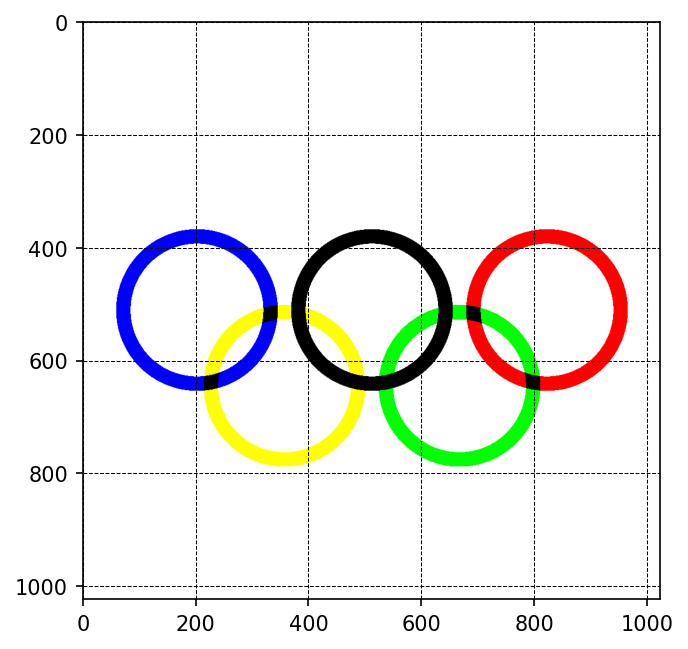

In [86]:
# Define the number of points along x and create a meshgrid
N = 2**10
x = np.linspace(-10, 10, num=N)
y = x
X, Y = np.meshgrid(x, y)

# Initialize arrays for red, green, blue, black, and yellow channels
Rd, Gn, Bl, Blk, Yl = np.ones((N, N)), np.ones((N, N)), np.ones((N, N)), np.ones((N, N)), np.ones((N, N))

# Draw colored circles
Rt, deg = 3.5, 30
R_out, R_in = 2.8, 2.3

# Calculate the coordinates of the center of the colored circles
xt, yt = Rt * np.cos(deg * np.pi / 180), 1.5*Rt * np.sin(deg * np.pi / 180)

# Calculate the distance from each point to the center of each circle and set color channels
R = np.sqrt((X - 2*xt) ** 2 + (Y) ** 2)
Rd[np.where((R <= R_out) & (R >= R_in))] = 0.0

R = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2)
Gn[np.where((R <= R_out) & (R >= R_in))] = 0.0

R = np.sqrt((X + 2*xt) ** 2 + (Y) ** 2)
Bl[np.where((R <= R_out) & (R >= R_in))] = 0.0

R = np.sqrt((X) ** 2 + (Y) ** 2)
Blk[np.where((R <= R_out) & (R >= R_in))] = 0.0

R = np.sqrt((X + xt) ** 2 + (Y - yt) ** 2)
Yl[np.where((R <= R_out) & (R >= R_in))] = 0.0

# Create a 3D array to represent the RGB image
I_rgb = np.zeros((N, N, 3))

I_rgb[..., 0] = Gn*Bl*Blk   # Red channel
I_rgb[..., 1] = Rd*Bl*Blk   # Green channel
I_rgb[..., 2] = Rd*Gn*Yl*Blk    # Blue channel

# Plot the RGB image
plt.figure(figsize=(5, 5), dpi=150)
plt.grid(color='black', linestyle='--', linewidth=0.5)  # Add grid
plt.imshow(I_rgb)
plt.show()

Above we recreated the Olympics logo by manually creating circles from arrays, specifying different element values depending on where the pixel lies. The way an RGB image works is that three channels for the red, green, and blue colors are used to express colors with its combinations. For example, we can separate the RGB of the image above as follows.

Text(0.5, 1.0, 'Blue channel')

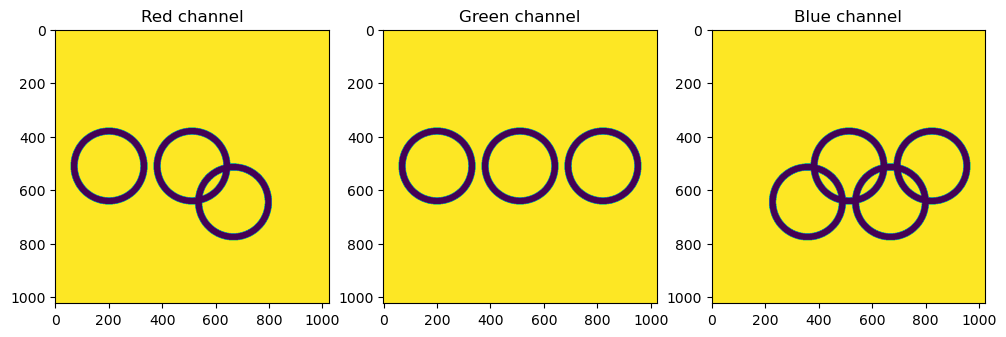

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(I_rgb[..., 0])
ax[0].set_title("Red channel")

ax[1].imshow(I_rgb[..., 1])
ax[1].set_title("Green channel")

ax[2].imshow(I_rgb[..., 2])
ax[2].set_title("Blue channel")

The first thing we can note is how everything is the same "color." Of course, since we separated the RGB we obtain a single channel for each, thus what we have is a grayscale image as explained above. We can use appropriate color maps for clarity, but remember how those colors are by our choice.

Text(0.5, 1.0, 'Blue channel')

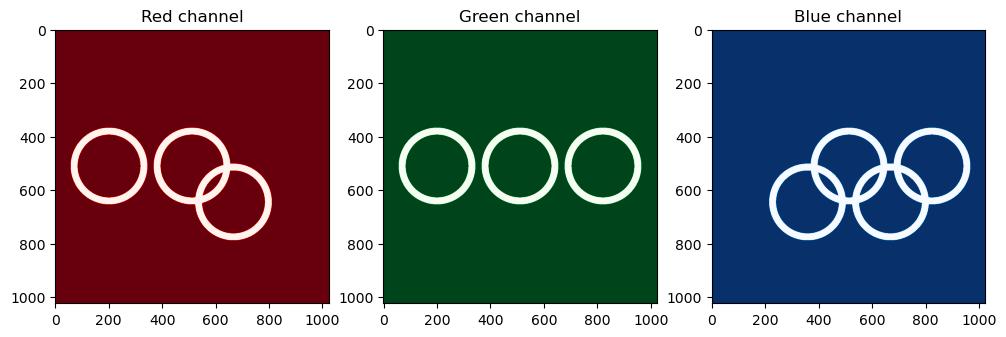

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(I_rgb[..., 0], cmap="Reds")
ax[0].set_title("Red channel")

ax[1].imshow(I_rgb[..., 1], cmap="Greens")
ax[1].set_title("Green channel")

ax[2].imshow(I_rgb[..., 2], cmap="Blues")
ax[2].set_title("Blue channel")

Adding red, green, and blue together create the color white. Thus observe how the background of the individual color channels are their respective colors (i.e. set to $1$) while the circles are hollowed out (set to $0$). This is an artifact of how I chose to assemble the colored circles. For example, notice how the the green and blue channels have hollowed out circles at the position of the red circle in the original image. Now imagine adding the layers above together, putting them on top of each other. Since the green and blue channels are hollowed out where the red channel has value or color, that position will be left with only red to show. The same is true if you look at the positions of where the green and blue circles should be. 

Meanwhile, the colors yellow, green, and black are created from the combination of the RGB. For example the yellow circle is created from adding red and green. Thus, notice how the position on the lower left is hollow for the blue channel, but is present for both red and green. On that position where only the red and green colors are present, a yellow circle is created. The same is true for the black circle. Notice how a center circle is present in all three channels. The absence of values in all three channels creates the color black. It is also due to this that the intersections between the circles are black. Noting the positions of all intersections and looking at the figure above, notice how they are all hollowed out in the RGB channels. The intersections are an artifact of how I chose to add up the colors together.

In this case, I implemented this in the code above using multiplication, wherein after setting up circles of the correct position and size, I could set appropriate pixels to zero by multiplying combinations of the array values of the circles and assigning them to the appropriate RGB channels.

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

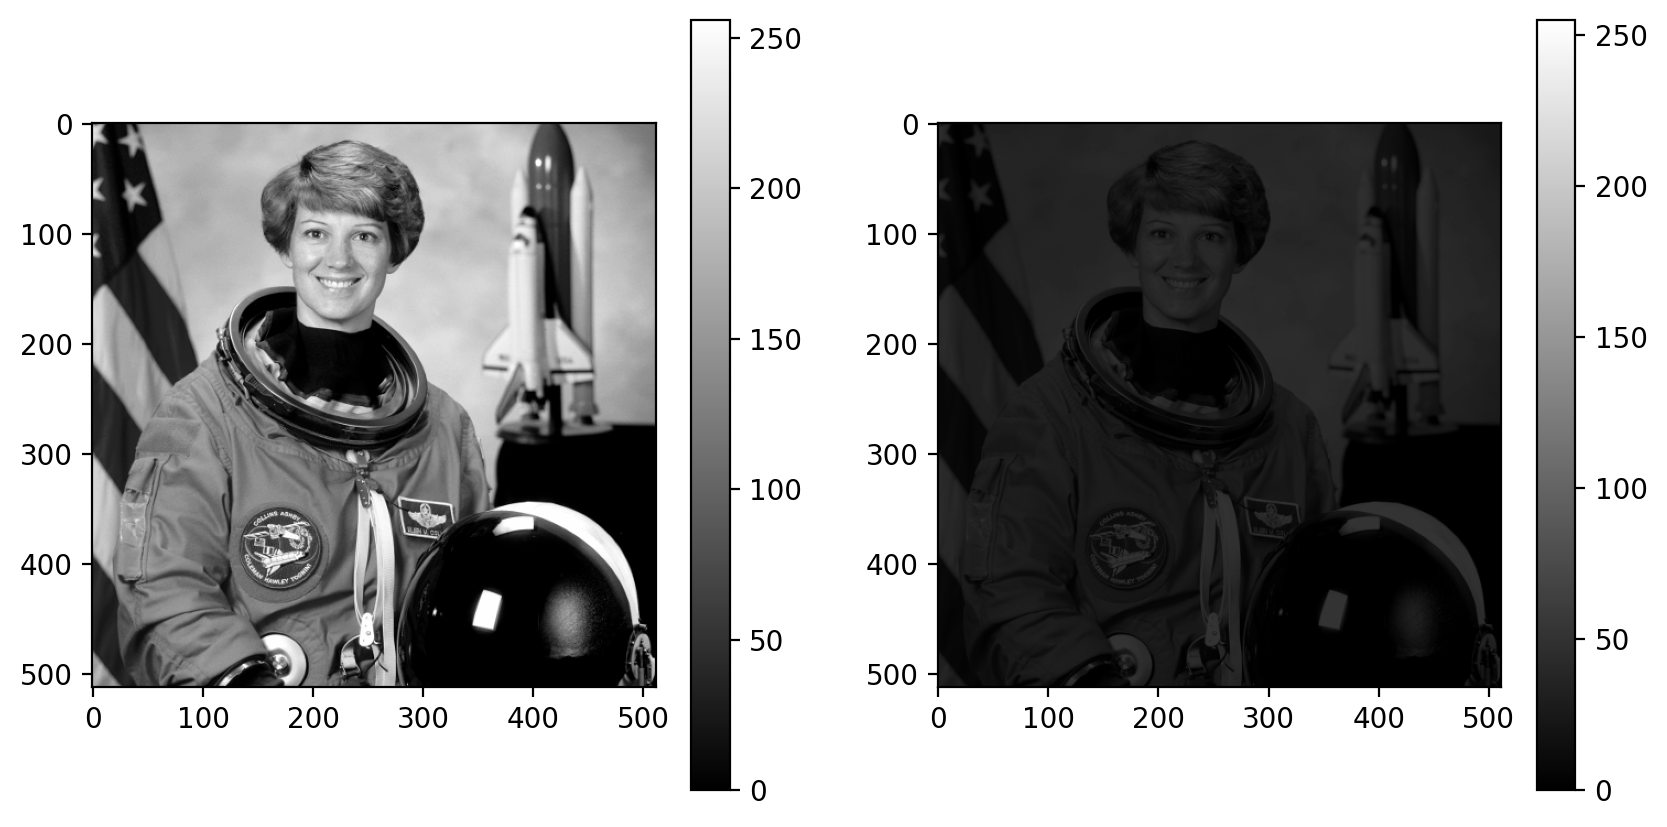

In [89]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 256)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

We can stretch the image using the equation given by,

$$ Stretch(I(r, c)) = \frac{I(r, c) - I_{min}}{I_{max} - I_{min}} (MAX - MIN) + MIN $$

where $I$ is a pixel or element of the image array, the subscripts max and min denote the maximum and minimum intensity values present in the array, and MAX and MIN denote the maximum and minimum intesity values possible. In the grayscale image above, this is $0$ and $255$ respectively. Thus it is straightforward to implement as below.

In [90]:
img_stretched = (img_low_contrast - np.min(img_low_contrast))/(np.max(img_low_contrast) - np.min(img_low_contrast))*255

By stretching the pixels to the highest and lowest intensity values possible, we create a vastly more contrasted image, with darker blacks and lighter whites.

Text(0.5, 1.0, 'Image histogram stretched')

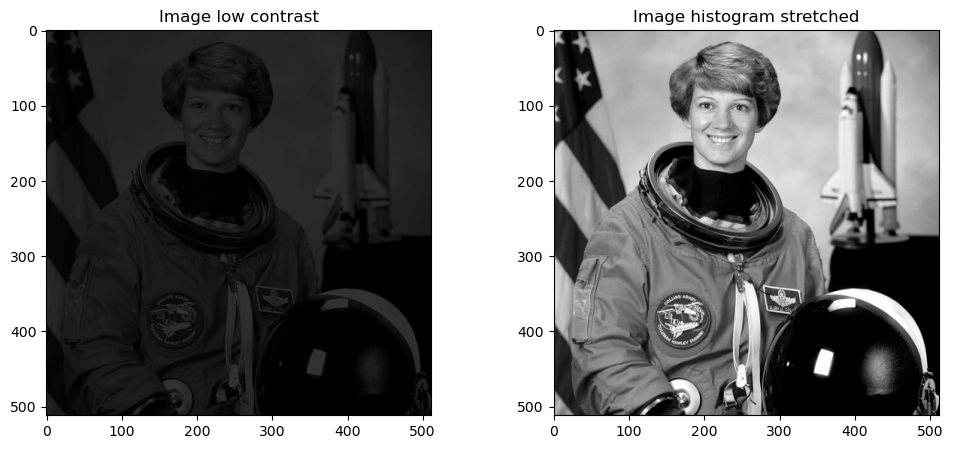

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(img_low_contrast, cmap='gray', vmax=256)
ax[0].set_title("Image low contrast")

ax[1].imshow(img_stretched, cmap='gray', vmax=256)
ax[1].set_title("Image histogram stretched")

We can better follow the stretching process by plotting the probability distributions.

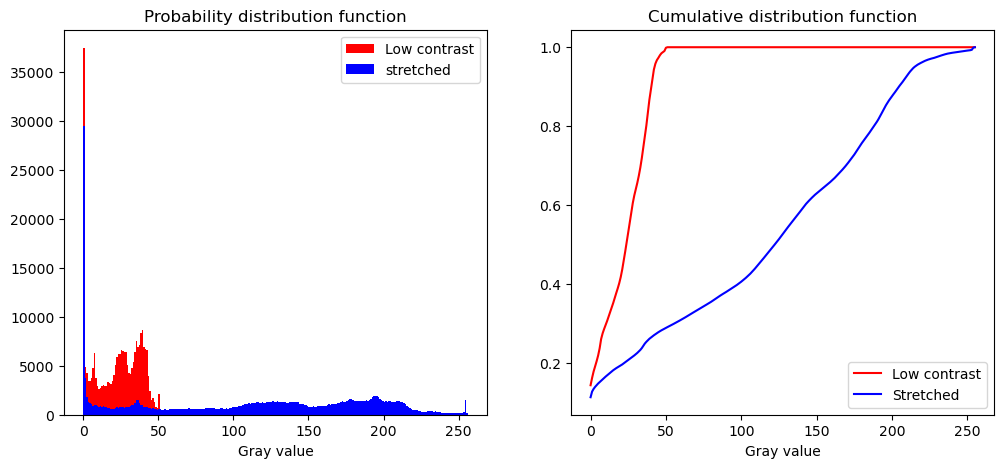

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

hist, bins = np.histogram(img_low_contrast.flatten(), 256, [0, 256])    # Create histogram 
cdf = hist.cumsum()     # Obtain cumulative distribution function from the histogram
cdf_normalized = cdf / cdf.max()    # Normalize

# The same but for the stretched image
hist_, bins_ = np.histogram(img_stretched.flatten(), 256, [0, 256])
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

ax[0].hist(img_low_contrast.flatten(), 256, [0, 256], color='r', label='Low contrast')
ax[0].hist(img_stretched.flatten(), 256, [0, 256], color='b', label='stretched')
ax[0].set_title("Probability distribution function")
ax[0].set_xlabel("Gray value")
ax[0].legend()

ax[1].plot(cdf_normalized, c='r', label='Low contrast')
ax[1].plot(cdf_normalized_, c='b', label='Stretched')
ax[1].set_title("Cumulative distribution function")
ax[1].set_xlabel("Gray value")
ax[1].legend()

Notice in the original probability distribution function plot how the values are gathered in the left-side of the plot. Remember how higher gray values approach white, as the value of $255$ is white and $0$ is black. Thus for the dark and low contrast astronaut image, it is expected that most values are gathered on the lower-valued side. After stretching the probability distribution, the available gray values are better taken advantaged of thus creating a better contrast profile. We observe the same in the cumulative distribution plot. In the low contrast image, the cumulative sum of the gray values are taken quickly as can be observed with the steep slope, which can be attributed to the fact that the majority of intensity values reside close to one another. Stretching the CDF therefore as in the almost linear result express how the values are better spread. The result is the brightened image above. Likewise, we can do the reverse as below.

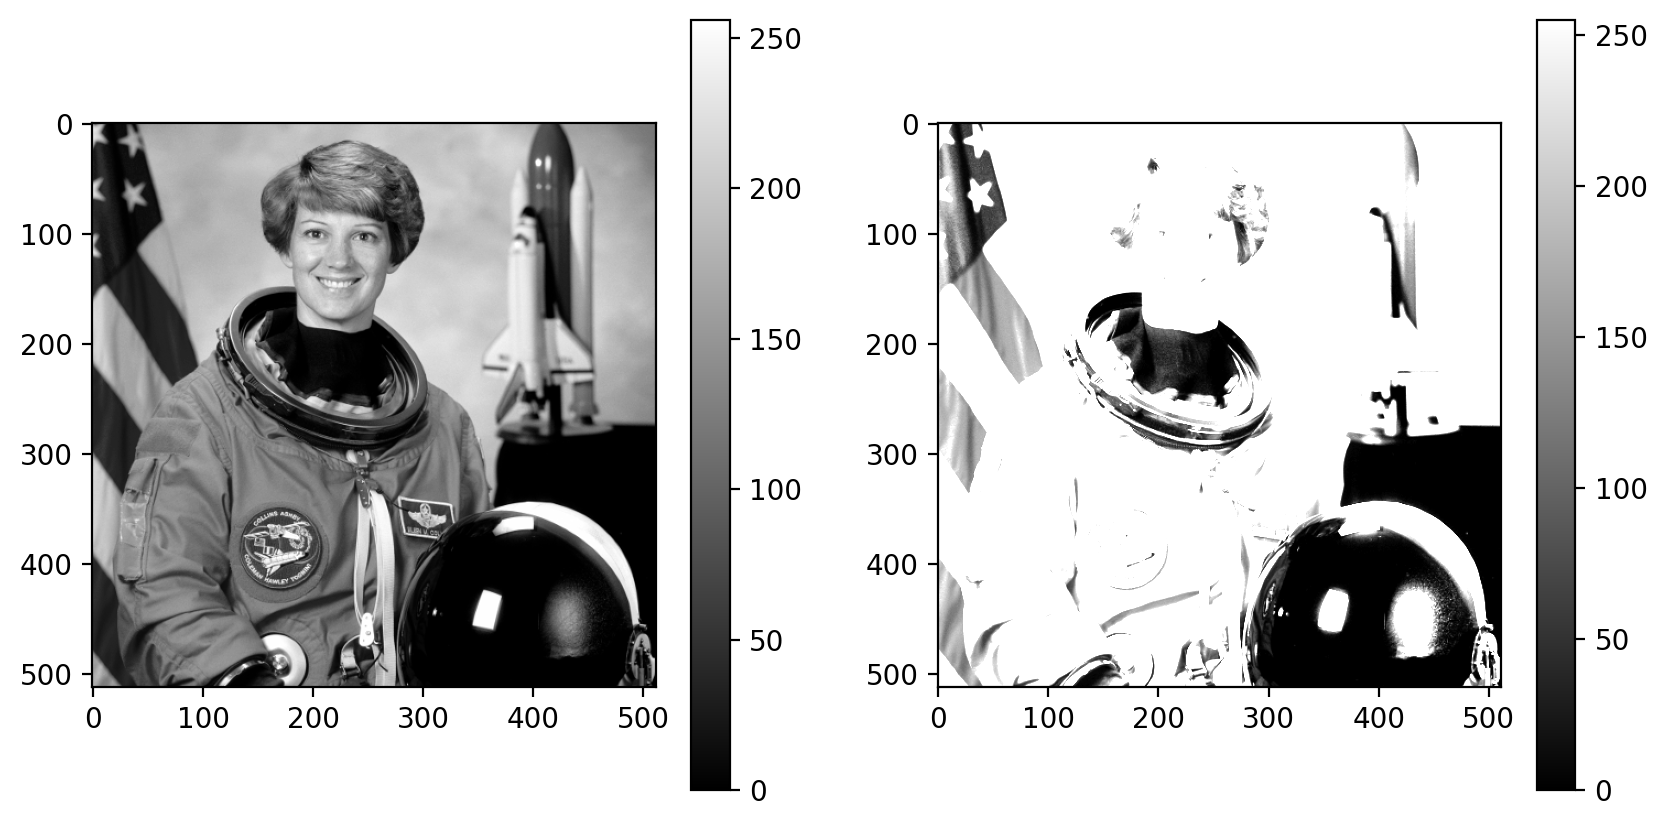

In [93]:
img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 256)
plt.colorbar()

img_high_contrast = img*5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_high_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

In [94]:
img_stretched = (img_high_contrast - np.min(img_high_contrast))/(np.max(img_high_contrast) - np.min(img_high_contrast))*255

By stretching the pixels to the highest and lowest intensity values possible, we create a vastly more contrasted image, with darker blacks and lighter whites.

Text(0.5, 1.0, 'Image histogram stretched')

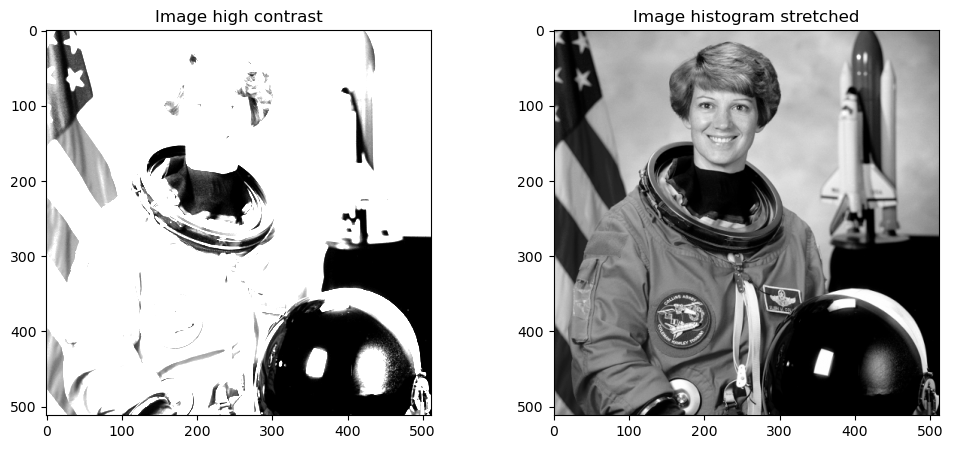

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(img_high_contrast, cmap='gray', vmax=256)
ax[0].set_title("Image high contrast")

ax[1].imshow(img_stretched, cmap='gray', vmax=256)
ax[1].set_title("Image histogram stretched")

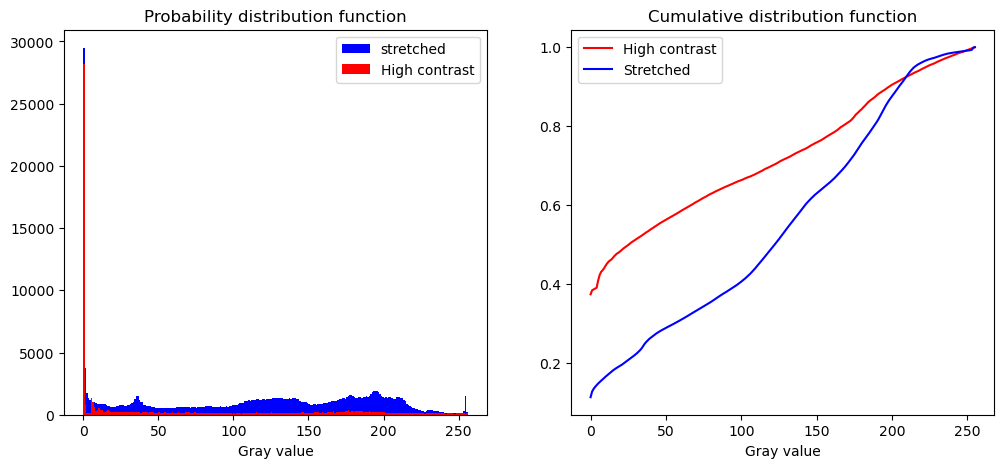

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

hist, bins = np.histogram(img_high_contrast.flatten(), 256, [0, 256])    # Create histogram 
cdf = hist.cumsum()     # Obtain cumulative distribution function from the histogram
cdf_normalized = cdf / cdf.max()    # Normalize

# The same but for the stretched image
hist_, bins_ = np.histogram(img_stretched.flatten(), 256, [0, 256])
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

ax[0].hist(img_stretched.flatten(), 256, [0, 256], color='b', label='stretched')
ax[0].hist(img_high_contrast.flatten(), 256, [0, 256], color='r', label='High contrast')
ax[0].set_title("Probability distribution function")
ax[0].set_xlabel("Gray value")
ax[0].legend()

ax[1].plot(cdf_normalized, c='r', label='High contrast')
ax[1].plot(cdf_normalized_, c='b', label='Stretched')
ax[1].set_title("Cumulative distribution function")
ax[1].set_xlabel("Gray value")
ax[1].legend()

Stretching the image works both ways. In general, reducing the steepness in slope of the CDF results in a better contrasted image.